# Part I - PISA Data
## by Ekaterina Kuznetsova

## Introduction
> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. This survey examines:
>- how well students have learned the school curriculum,
>- how well prepared they are for life beyond school etc.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# open file
pd.set_option('display.max_columns', 636)

pisa = pd.read_csv('pisa2012.csv',  encoding='latin-1',
 dtype={15: str, 16: str, 17: str, 21: str, 22: str, 23: str, 24: str, 25: str, 26: str, 37: str,
           45: str, 65: str, 123: str, 156: str, 157: str, 158: str, 159: str, 160: str, 161: str,
           162: str, 163: str, 164: str, 165: str, 166: str, 167: str, 168: str, 169: str, 170: str,
           171: str, 284: str, 285: str, 286: str, 287: str, 288: str, 289: str, 290: str, 291: str,
           292: str, 293: str, 294: str, 295: str, 296: str, 297: str, 298: str, 299: str, 300: str,
           301: str, 302: str, 303: str, 307: str, 308: str, 309: str, 310: str, 311: str, 312: str,
           313: str, 314: str, 315: str, 316: str, 317: str, 318: str, 319: str, 320: str, 321: str,
           322: str, 323: str, 324: str, 325: str, 326: str, 327: str, 328: str, 329: str, 330: str,
           331: str, 332: str, 333: str, 334: str, 335: str, 336: str, 337: str, 338: str, 339: str,
           340: str, 341: str, 342: str, 343: str, 344: str, 345: str, 346: str, 347: str, 348: str,
           349: str, 350: str, 351: str, 352: str, 353: str, 354: str, 355: str, 356: str, 357: str,
           376: str, 377: str, 378: str, 379: str, 380: str, 381: str, 382: str, 383: str, 384: str,
           385: str, 386: str, 387: str, 388: str, 389: str, 390: str, 391: str, 392: str, 393: str,
           394: str, 395: str, 396: str, 397: str, 398: str, 399: str, 400: str, 401: str, 402: str,
           403: str, 475: str, 30: str, 31: str, 36: str, 155: str}                  )

In [3]:
pisa.sample(5)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [4]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [5]:
pisa.shape

(485490, 636)

### What is the structure of your dataset?

>This Dataset is very large and contains 635 fatures from  more then 485K students.

### What is/are the main feature(s) of interest in your dataset?

> This Dataset give us a lot of interesting infomation such as:
how well students have learned the school curriculum or which scores get students in different subjects.
And i would like to focus on the academic performance in Mathematics, Reading and Science.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 I focus on following variables:
- 'CNT' about the country of birth for students and parents.
- 'LNT' Language Table about language use at home
- 'ST04Q01' (Gender), has two values; male or female.
- 'IMMIG' (Immigration), has three values; native, first generation, and second generation.
-  PV…MATH (Mathematik), PV…READ (Reading), PV…SCIE (Sciense), with each feature have scores ranging from 1-5. 
- 'HISCED' Parents Highest Education.
- ‘Wealth’this column represents an index of family wealth. 
- 'Mother Job' and 'Mother at Home'.
- And Programming skills.


## Clean/Tidy the Dataset

In [6]:
#Rename some of the columns to be more intiuitive and useful
cols=['CNT','ST04Q01', 'ST57Q05',
             'HISCED', 'IMMIG','WEALTH',
            'ST03Q02','ST15Q01','ST49Q07','ST11Q01',
             'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ',
            'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE',
            'PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH']
pisa_clean = pd.read_csv('pisa2012.csv', usecols=cols, encoding = "ISO-8859-1")

In [7]:
# create list of the required column names
pisa_clean.rename({'CNT':'Country', 'ST04Q01':'Gender', 'ST57Q05':'Study Time With Parent',
             'HISCED':'Parents Highest Education', 'IMMIG':'Immigration Status','WEALTH':'Wealth',
            'ST03Q02':' Year Birth','ST15Q01':'Mother Job Status','ST49Q07':'Programming','ST11Q01':'Mother Home',
             'PV1READ':'R1','PV2READ':'R2','PV3READ':'R3','PV4READ':'R4','PV5READ':'R5',
            'PV1SCIE':'S1','PV2SCIE':'S2','PV3SCIE':'S3','PV4SCIE':'S4','PV5SCIE':'S5',
            'PV1MATH':'M1','PV2MATH':'M2','PV3MATH':'M3','PV4MATH':'M4','PV5MATH':'M5'},
            axis='columns', inplace=True)

#pisa = ['Country', 'Gender','Immigration Status','Parents Highest Education','Wealth','Mother Job Status', 
#'Programming','Mother Home','M1','M2','M3','M4','M5', 'R1','R2','R3','R4','R5','S1','S2','S3','S4','S5']

In [8]:
pisa_clean.head()

,Country,Year Birth,Gender,Mother Home,Mother Job Status,Programming,Study Time With Parent,Parents Highest Education,Immigration Status,Wealth,M1,M2,M3,M4,M5,R1,R2,R3,R4,R5,S1,S2,S3,S4,S5
0,Albania,1996,Female,Yes,"Other (e.g. home duties, retired)",Never or rarely,NaN,"ISCED 3A, ISCED 4",Native,-2.92,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,1996,Female,Yes,Working full-time <for pay>,Never or rarely,0.0,"ISCED 5A, 6",Native,0.69,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
2,Albania,1996,Female,Yes,Working full-time <for pay>,Never or rarely,2.0,"ISCED 5A, 6",Native,-0.23,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
3,Albania,1996,Female,Yes,Working full-time <for pay>,NaN,0.0,"ISCED 5A, 6",Native,-1.17,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
4,Albania,1996,Female,Yes,Working part-time <for pay>,Sometimes,NaN,"ISCED 3A, ISCED 4",Native,-1.17,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


In [9]:
# check column data types
pisa.dtypes

Unnamed: 0      int64
CNT            object
SUBNATIO        int64
STRATUM        object
OECD           object
               ...   
W_FSTR80      float64
WVARSTRR        int64
VAR_UNIT        int64
SENWGT_STU    float64
VER_STU        object
Length: 636, dtype: object

In [10]:
# add mean value for math, reading, science
pisa_clean['Math_Mean']=(pisa['PV1MATH']+pisa['PV2MATH']+pisa['PV3MATH']+pisa['PV4MATH']+pisa['PV5MATH'])/5
pisa_clean['Reading_Mean']=(pisa['PV1READ']+pisa['PV2READ']+pisa['PV3READ']+pisa['PV4READ']+ pisa['PV5READ'])/5
pisa_clean['Science_Mean']=(pisa['PV1SCIE']+pisa['PV2SCIE']+pisa['PV3SCIE']+pisa['PV4SCIE']+pisa['PV5SCIE'])/5

In [11]:
pisa_clean.drop(columns=['M1', 'M2','M3','M4','M5','R1', 'R2','R3','R4','R5','S1', 'S2','S3','S4','S5'], axis=1, inplace=True)
pisa_clean.head(3)

,Country,Year Birth,Gender,Mother Home,Mother Job Status,Programming,Study Time With Parent,Parents Highest Education,Immigration Status,Wealth,Math_Mean,Reading_Mean,Science_Mean
0,Albania,1996,Female,Yes,"Other (e.g. home duties, retired)",Never or rarely,NaN,"ISCED 3A, ISCED 4",Native,-2.92,366.18634,261.01424,371.91348
1,Albania,1996,Female,Yes,Working full-time <for pay>,Never or rarely,0.0,"ISCED 5A, 6",Native,0.69,470.56396,384.68832,478.12382
2,Albania,1996,Female,Yes,Working full-time <for pay>,Never or rarely,2.0,"ISCED 5A, 6",Native,-0.23,505.53824,405.18154,486.60946


In [12]:
#unique values 
print(pisa_clean['Parents Highest Education'].unique())
print(pisa_clean['Immigration Status'].unique())
print(pisa_clean['Mother Job Status'].unique())
print(pisa_clean['Mother Home'].unique())
print(pisa_clean['Gender'].unique())
print(pisa_clean['Country'].unique())
print(pisa_clean['Programming'].unique())

['ISCED 3A, ISCED 4' 'ISCED 5A, 6' 'ISCED 3B, C' 'ISCED 2' 'ISCED 5B'
 'None' 'ISCED 1' nan]
['Native' nan 'Second-Generation' 'First-Generation']
['Other (e.g. home duties, retired) ' 'Working full-time <for pay> '
 'Working part-time <for pay>' 'Not working, but looking for a job ' nan]
['Yes' nan 'No']
['Female' 'Male']
['Albania' 'United Arab Emirates' 'Argentina' 'Australia' 'Austria'
 'Belgium' 'Bulgaria' 'Brazil' 'Canada' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Czech Republic' 'Germany' 'Denmark' 'Spain' 'Estonia'
 'Finland' 'France' 'United Kingdom' 'Greece' 'Hong Kong-China' 'Croatia'
 'Hungary' 'Indonesia' 'Ireland' 'Iceland' 'Israel' 'Italy' 'Jordan'
 'Japan' 'Kazakhstan' 'Korea' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Latvia' 'Macao-China' 'Mexico' 'Montenegro' 'Malaysia' 'Netherlands'
 'Norway' 'New Zealand' 'Peru' 'Poland' 'Portugal' 'Qatar'
 'China-Shanghai' 'Perm(Russian Federation)' 'Florida (USA)'
 'Connecticut (USA)' 'Massachusetts (USA)' 'Romania' 'Russia

In [13]:
# fixing missing values

#pisa_clean = pisa.dropna('Immigration Status')
#pisa_clean.shape


In [14]:
pisa_clean.sample(3)

,Country,Year Birth,Gender,Mother Home,Mother Job Status,Programming,Study Time With Parent,Parents Highest Education,Immigration Status,Wealth,Math_Mean,Reading_Mean,Science_Mean
35547,Australia,1996,Female,Yes,"Not working, but looking for a job",NaN,0.0,"ISCED 3A, ISCED 4",Native,-0.08,474.45866,509.07734,472.34238
335915,Mexico,1996,Male,Yes,"Other (e.g. home duties, retired)",Never or rarely,0.0,ISCED 1,Native,-2.04,363.61584,356.36612,382.63708
267039,Italy,1996,Female,Yes,Working full-time <for pay>,Sometimes,NaN,"ISCED 5A, 6",Native,0.92,466.82506,527.82300,487.44872


In [15]:
# fixing type issues

# change gender type and immigration status from object to categorical:
immig_dt = pd.api.types.CategoricalDtype(categories=['Native','Second-Generation','First-Generation'], ordered=True)
pisa_clean.loc[:,'Immigration Status'] = pisa_clean['Immigration Status'].astype(immig_dt)

parenteduc_dt = pd.api.types.CategoricalDtype(
                    categories=['None','ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, ISCED 4','ISCED 5B','ISCED 5A, 6'],
                    ordered=True)
pisa_clean.loc[:,'Parents Highest Education'] = pisa_clean['Parents Highest Education'].astype(parenteduc_dt)

pisa_clean.dtypes

Country                        object
 Year Birth                     int64
Gender                         object
Mother Home                    object
Mother Job Status              object
Programming                    object
Study Time With Parent        float64
Parents Highest Education    category
Immigration Status           category
Wealth                        float64
Math_Mean                     float64
Reading_Mean                  float64
Science_Mean                  float64
dtype: object

In [16]:
# test
pisa_clean.sample(3)

# save pisa_clean
pisa_clean.to_csv("pisa_clean.csv", index=False, encoding='latin-1')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Distributon of Gender Representation

In [17]:
# gender representation
pisa_clean.Gender.value_counts()


Female    245064
Male      240426
Name: Gender, dtype: int64

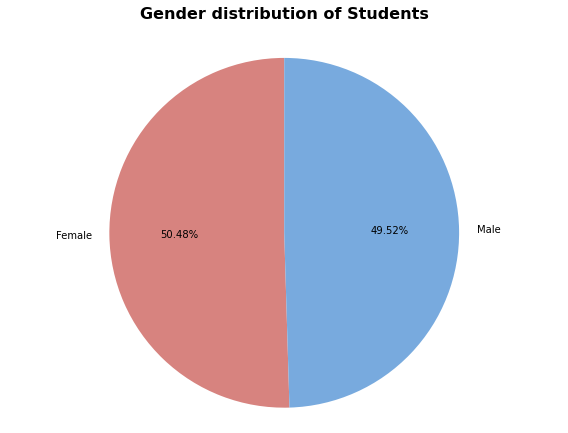

In [18]:
# plot gender representation

fig1, ax1 = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
patches, texts, autotexts = ax1.pie(pisa_clean.Gender.value_counts(), 
                                    colors = ['#d7837f','#78aade'],
                                    labels=['Female','Male'],
                                    autopct='%0.2f%%',
                                    startangle=90 );

ax1.set_title('v = 1',fontweight="bold", fontsize=25) # Title

    
ax1.axis('equal');
plt.tight_layout();
plt.title('Gender distribution of Students', fontsize=16,fontweight="heavy", y = 1.04)
plt.show();

### Distributon of Students Countries

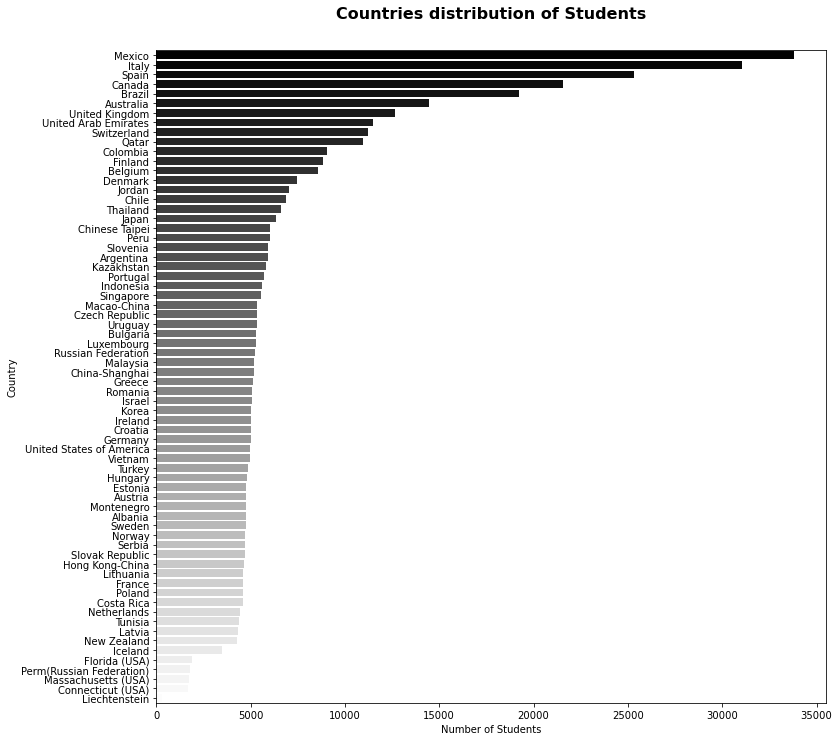

In [19]:
# plot for country of students
# sorted by frequency

plt.figure(figsize = [12, 12])
cat_order = pisa_clean.Country.value_counts().index
sb.countplot(data=pisa_clean, y='Country', palette = "gist_gray", order = cat_order)
plt.title('Countries distribution of Students', fontsize=16,fontweight="heavy", y = 1.04)
plt.ylabel('Country');
plt.xlabel('Number of Students');

- Most of Students for this research have Mexico, Italy and Spain residense
- And least number of students from Liechtenstein, 1 city of Russia and individual states of USA.

###  Distribution of Students Immigration Status

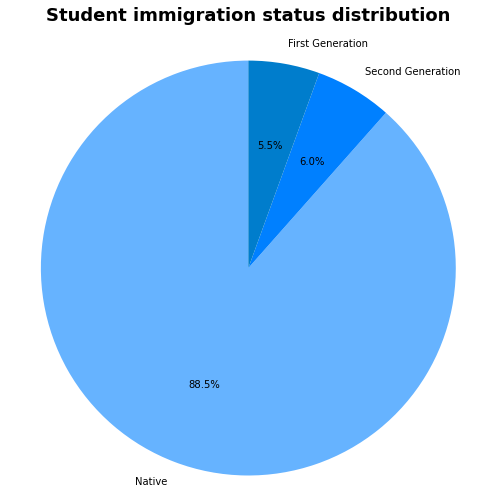

In [20]:
fig1, ax1 = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
plt.title('Student immigration status distribution', fontsize=18,fontweight="heavy", y = 1.04)
patches, texts, autotexts = ax1.pie(pisa_clean['Immigration Status'].value_counts(), 
                                    colors = ['#66b3ff','#0080ff','#007dcc'],
                                    autopct='%0.1f%%',
                                    labels=['Native', 'Second Generation', 'First Generation'],
                                    startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.show();

- Most students are native to their country of residence. And less than 30K students are in the first or second generation of immigrants.
- First and second generation immigrants are equivalently reprensented in the dataset

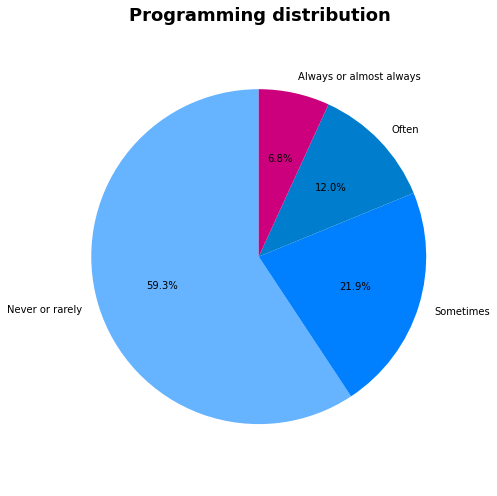

In [21]:
fig1, ax1 = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
plt.title('Programming distribution', fontsize=18,fontweight="heavy")
patches, texts, autotexts = ax1.pie(pisa_clean['Programming'].value_counts(), 
                                    colors = ['#66b3ff','#0080ff','#007dcc','#cc007d'],
                                    autopct='%0.1f%%',
                                    labels=['Never or rarely','Sometimes','Often','Always or almost always'],
                                    startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.show();

### Distribution of Welth in Student Families

In [22]:
# using the .describe method, return basic statistical details of Wealth variable
pisa_clean.Wealth.describe()

count    479597.00000
mean         -0.33701
std           1.21530
min          -6.65000
25%          -1.04000
50%          -0.30000
75%           0.43000
max           3.25000
Name: Wealth, dtype: float64

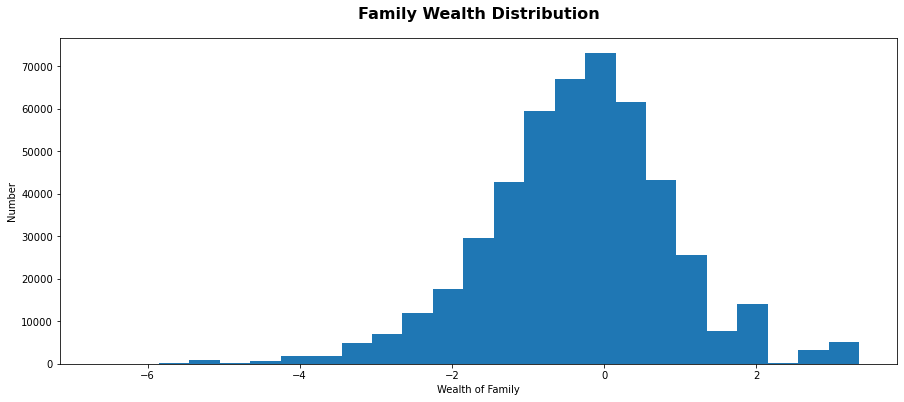

In [23]:
# distribution of Wealth

plt.figure(figsize=[15, 6])
bin_edges = np.arange(pisa_clean['Wealth'].min(),pisa_clean['Wealth'].max()+.3,.4)

plt.hist(data = pisa_clean, x = 'Wealth', bins = bin_edges);
plt.xlabel('Wealth of Family')
plt.ylabel('Number')
plt.title('Family Wealth Distribution', fontsize=16,fontweight="heavy", y = 1.04);

### Distribution of Parents Highest Education

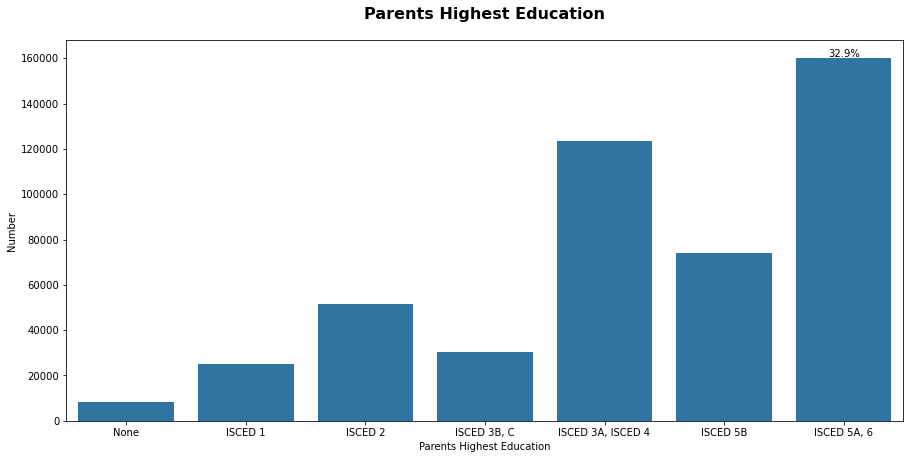

In [24]:
# Distribution of Parents Highest Education

plt.figure(figsize=[15, 7]);
sb.countplot(x = 'Parents Highest Education', 
             data = pisa_clean, color = sb.color_palette()[0]);

cat_counts = pisa_clean['Parents Highest Education'].value_counts()
locs, labels = plt.xticks() 
n_p = pisa_clean.shape[0]

# loop through locations and labels
for loc, label in zip(locs, labels):
    
   # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_str = '{:0.1f}%'.format(100*count/n_p)

# print the annotation just below the top of the bar
plt.text(loc, count-8, pct_str, va='bottom', color = 'black',ha = 'center')

plt.ylabel('Number')
plt.title('Parents Highest Education', fontsize=16,fontweight="heavy", y = 1.04);

- Most parents have upper secondary education level
- 32,9% of parents have at least Bachelor degree.

### Destribution of Maths, Reading and Science scores


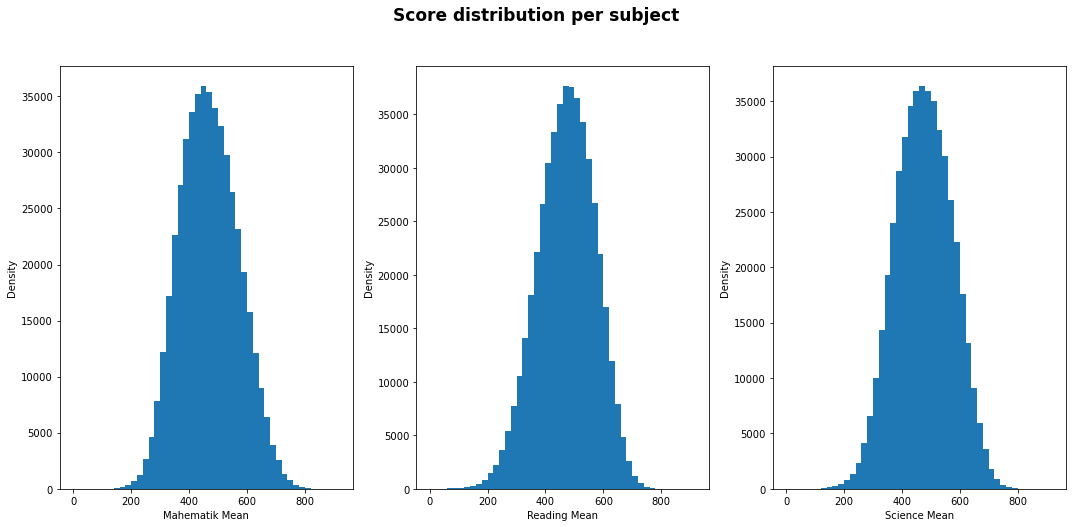

In [25]:
# Destribution of Maths, Reading and Science scores

f, axes = plt.subplots(1, 3, figsize=(15, 7), sharex=True)
bin_edges = np.arange(0, 905+20, 20)

plt.suptitle('Score distribution per subject', fontsize=17,fontweight="heavy", y = 1.04)
plt.subplot(1,3,1)
sb.distplot(pisa_clean['Math_Mean'],kde = False, hist_kws = {'alpha':1}, bins = bin_edges)
plt.ylabel('Density')
plt.xlabel('Mahematik Mean')

plt.subplot(1,3,2)
sb.distplot(pisa_clean['Reading_Mean'], kde = False, hist_kws = {'alpha':1}, bins = bin_edges)
plt.ylabel('Density')
plt.xlabel('Reading Mean')

plt.subplot(1,3,3)
sb.distplot(pisa_clean['Science_Mean'], kde = False, hist_kws = {'alpha':1}, bins = bin_edges)
plt.ylabel('Density')
plt.xlabel('Science Mean')
plt.tight_layout()
plt.show()

- Most of students have scores in the range between 350 and 650.
- All 3 Scores are normally distributed
- Mean of all distributions near to 500

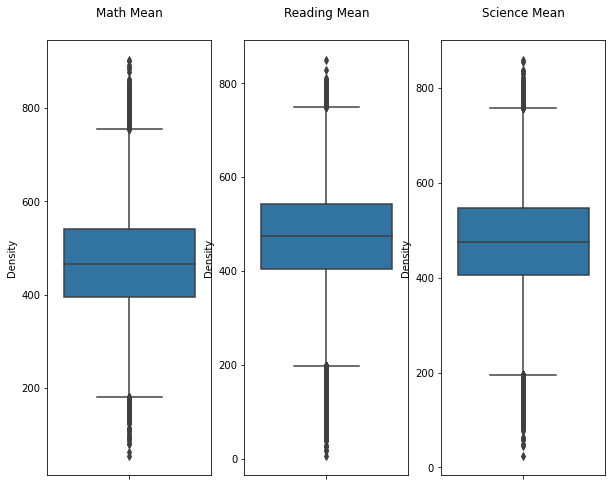

In [26]:
# same, but as box plot presented
# which show the relationship between  mean scores and density

#sb.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color)

plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1)
sb.boxplot(y=pisa_clean['Math_Mean'])
plt.title('Math Mean', y = 1.04)
plt.ylabel('Density')

plt.subplot(1, 3, 2)
sb.boxplot(y=pisa_clean['Reading_Mean'])
plt.title('Reading Mean', y = 1.04)
plt.ylabel('Density')

plt.subplot(1, 3, 3)
sb.boxplot(y=pisa_clean['Science_Mean'])
plt.title('Science Mean', y = 1.04)
plt.ylabel('Density');

  - Reading Mean is obviously higher then Science and Mathematik Mean

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of parents have upper secondary education level and 32,9% of parents have at least Bachelor degree. Distribution Wealth of Families loooks like normal distribution, but we can that there is more poorer( less then mean) families. Unususual point in this distribution for me that exist a gap between very wealth families and less wealthy.
Most students are native to their country of residence. And less than 30K students are in the first or second generation of immigrants. First and second generation immigrants are equivalently reprensented in the dataset
Reading Mean is obviously higher then Science and Mathematik Mean
Most of Students for this research have Mexico, Italy and Spain residense And least number of students from Liechtenstein, 1 city of Russia and individual states of USA. So we need to merge individual states and citys to the coutries, then our data will be consistenter.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Unususual point in the wealth distribution for me that exist a gap between very wealth families and less wealthy families

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [27]:
# Before we starting lets define variables for the exploration

numeric_vars = ['Math_Mean', 'Reading_Mean', 'Science_Mean', 'Wealth']

### Scatteplot between Wealth Index and Mathematic score

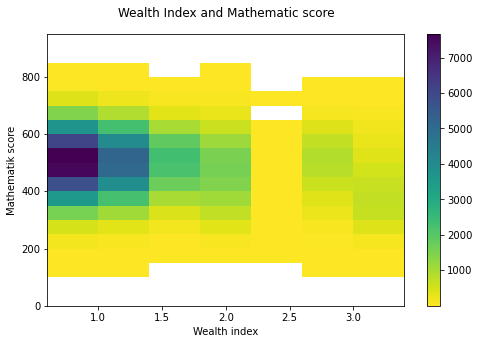

In [28]:
# correlation plot as color map
# between Wealth Index and Mathematic score

plt.figure(figsize = [8, 5])

def scatterplot():
  # data setup
  bins_x = np.arange(0.6, pisa_clean['Wealth'].max()+0.4, 0.4)
  bins_y = np.arange(0, pisa_clean['Math_Mean'].max()+50, 50)
  plt.hist2d(data = pisa_clean, x = 'Wealth', y = 'Math_Mean',
             bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
  plt.colorbar()
  plt.xlabel('Wealth index')
  plt.ylabel('Mathematik score')
  plt.title('Wealth Index and Mathematic score', y = 1.04)

scatterplot()

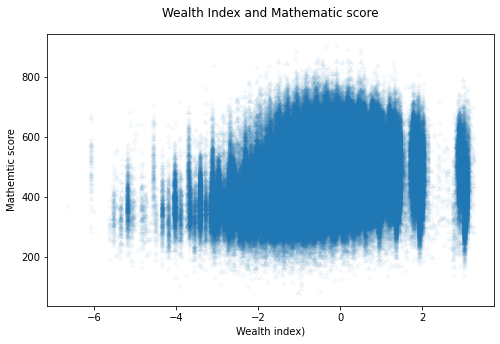

In [29]:
# the same presented as scatter

plt.figure(figsize = [8, 5])

def scatterplot():
  # data setup
  plt.scatter(data = pisa_clean, x = 'Wealth', y = 'Math_Mean', alpha =1/20, edgecolors ='None',marker=r'$\clubsuit$')
  # diagonal line from (10,10) to (60,60)
  plt.xlabel('Wealth index)')
  plt.ylabel('Mathemtic score')
  plt.title('Wealth Index and Mathematic score', y = 1.04);

scatterplot()

- Below to see how wealth of family affect math scores.
- Obtained plots show us normal distributon and most of scores in the middle.

### Bar chart between Programming and Gender

In [30]:
# Types of sedan cars
prog = ['Never or rarely','Sometimes','Often','Always or almost always']
# Returns the types for sedan_classes with the categories and orderedness
classes = pd.api.types.CategoricalDtype(ordered=True, categories=prog)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
pisa_clean['Programming'] = pisa_clean['Programming'].astype(classes)

# Preparation of gender column
pisa_clean['Gender'] = pisa_clean['Gender'].apply(lambda x:x.split()[0])
pisa_clean.head(3)

,Country,Year Birth,Gender,Mother Home,Mother Job Status,Programming,Study Time With Parent,Parents Highest Education,Immigration Status,Wealth,Math_Mean,Reading_Mean,Science_Mean
0,Albania,1996,Female,Yes,"Other (e.g. home duties, retired)",Never or rarely,NaN,"ISCED 3A, ISCED 4",Native,-2.92,366.18634,261.01424,371.91348
1,Albania,1996,Female,Yes,Working full-time <for pay>,Never or rarely,0.0,"ISCED 5A, 6",Native,0.69,470.56396,384.68832,478.12382
2,Albania,1996,Female,Yes,Working full-time <for pay>,Never or rarely,2.0,"ISCED 5A, 6",Native,-0.23,505.53824,405.18154,486.60946


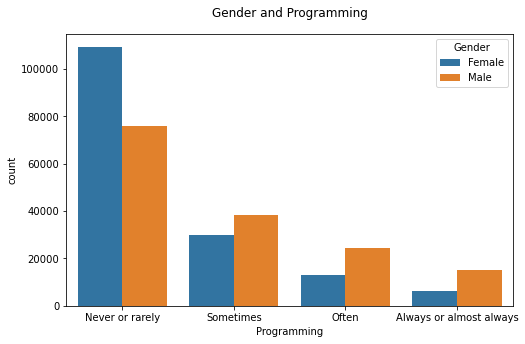

In [31]:
#plot the bar chart
plt.figure(figsize = [8, 5])
plt.title('Gender and Programming', y = 1.04)
sb.countplot(data = pisa_clean, x = 'Programming', hue = 'Gender');

- most of kids is not programming at home
- those of them who programming boys and geeks guys (who programming always)
- boys (who programming always) approximately in three times more then girls.


### Influence work of mother on Math grades

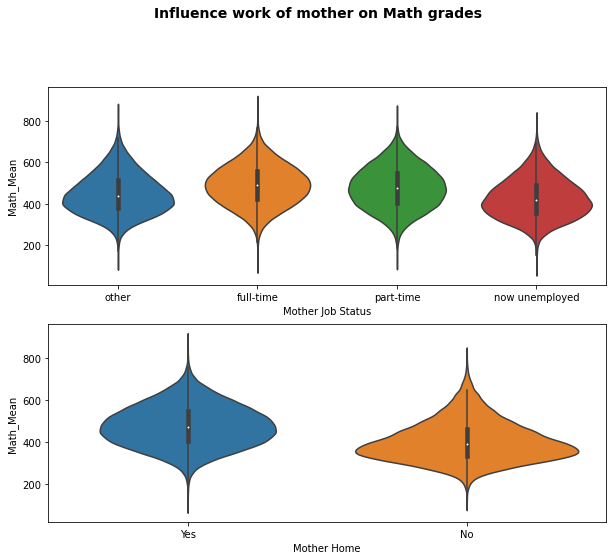

In [39]:
categoric = ['Mother Job Status','Mother Home']

# replace values in Mother Job Status:
pisa_clean['Mother Job Status'].replace({'Working full-time <for pay> ' : 'full-time',
                                     'Other (e.g. home duties, retired) ' : 'other', 
                                     'Working part-time <for pay>' : 'part-time', 
                                     'Not working, but looking for a job ' : 'now unemployed'}, inplace=True)

fig , ax= plt.subplots(ncols= 1, nrows = 2, figsize=[10,8])
plt.suptitle('Influence work of mother on Math grades', fontsize=14,fontweight="heavy", y = 1.02)

for i in range(len(categoric)):
    var = categoric[i]
    sb.violinplot(data= pisa_clean, x= var, y = 'Math_Mean', ax= ax[i]);

 - Grades in Math significant higher by them whose mother at home
 - And children full-time working mother has better grades then 
 - those whose mother unemployed or working part-time. Suddenly.

### Immigration Status and Wealth

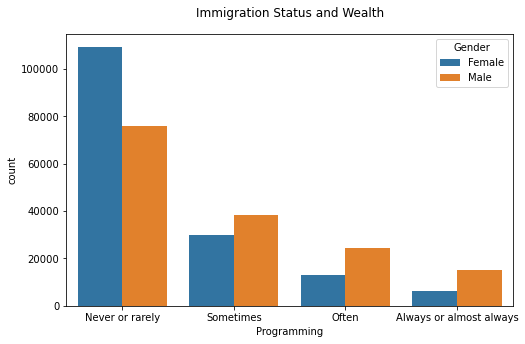

In [41]:
#plot the bar chart
plt.figure(figsize = [8, 5])
plt.title('Immigration Status and Wealth', y=1.04)
sb.countplot(data = pisa_clean, x = 'Programming', hue = 'Gender');

- We can see from this Scatterplot that familes with  native immigration status more wealth then first-and second generation
- This plot is difficult to interpret, because nummeric data is discriptive and that difficult to see distribution of data

### Dependency immigration and parents education on Scores

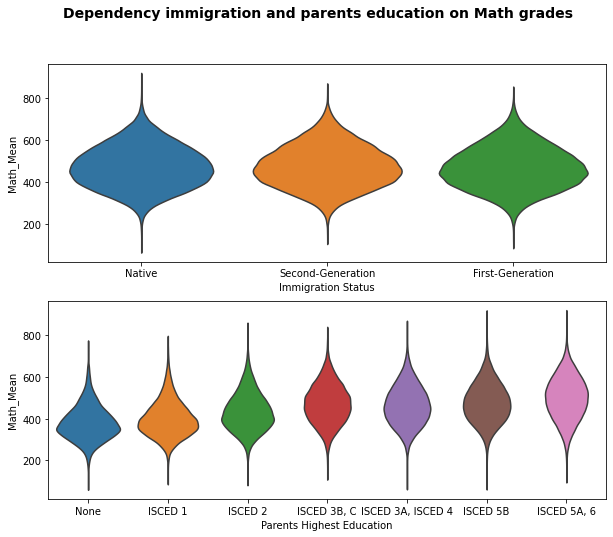

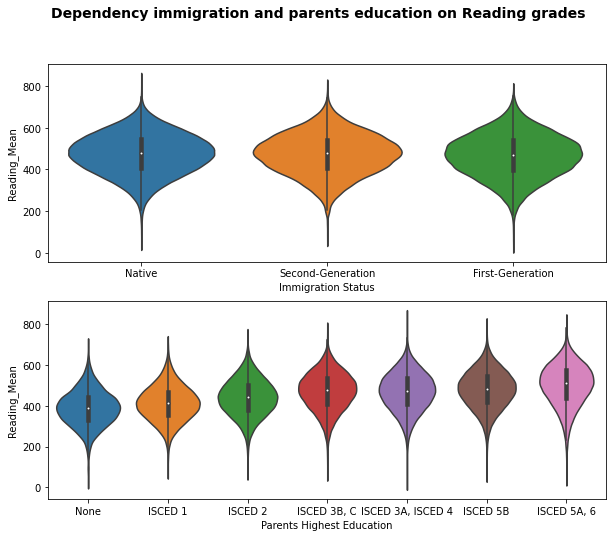

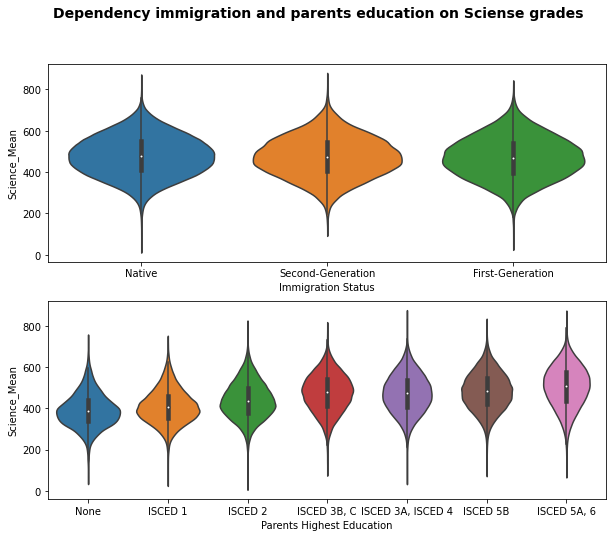

In [34]:
categoric= ['Immigration Status','Parents Highest Education']

fig , ax= plt.subplots(ncols= 1, nrows = 2, figsize=[10,8])
plt.suptitle('Dependency immigration and parents education on Math grades', fontsize=14,fontweight="heavy")
for i in range(len(categoric)):
    var = categoric[i]
    sb.violinplot(data= pisa_clean, x= var, y = 'Math_Mean', ax= ax[i], inner=None)
fig , ax= plt.subplots(ncols= 1, nrows = 2, figsize=[10,8])

plt.suptitle('Dependency immigration and parents education on Reading grades', fontsize=14,fontweight="heavy")
for i in range(len(categoric)):
    var = categoric[i]
    sb.violinplot(data= pisa_clean, x= var, y = 'Reading_Mean', ax= ax[i])  
    
fig , ax= plt.subplots(ncols= 1, nrows = 2, figsize=[10,8])   
plt.suptitle('Dependency immigration and parents education on Sciense grades', fontsize=14,fontweight="heavy")
for i in range(len(categoric)):
    var = categoric[i]
    sb.violinplot(data= pisa_clean, x= var, y = 'Science_Mean', ax= ax[i])

__From the violin plot of all scores obviosly:__
- 1. Tthe higher the education of the parents, then better assessment of their children
- that most evident in math and sciense
- 2. Immigration status has just a little impact on the notes


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a lot of interesting correlations between mother job status and math scores. When mother at home notes in math is significantly higher (approximately on 30 points) then by them whose mother is working.
Absolutely signifficant,that je higher degree of parents then higher the note schoolchildren in this 3 disciplines.
Most of kids is not programming at home, but most of them who programming boys and geeks guys (who programming always) approximately in three times more then girls.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was surprised, that by uneployed (looking for a job) mothers scores of their childs is lower then by full-time working mothes. Also interesting that immigration status have not signifficant impact on the notes

## Multivariate Exploration

> In this part of analysis, I explore some  features and/or dependent variables in unexpected ways.
To start, I will look at the how OECD membership status maps to wealth and the maths scores, using a faceted heat map.

### Scores per Gender in Countries

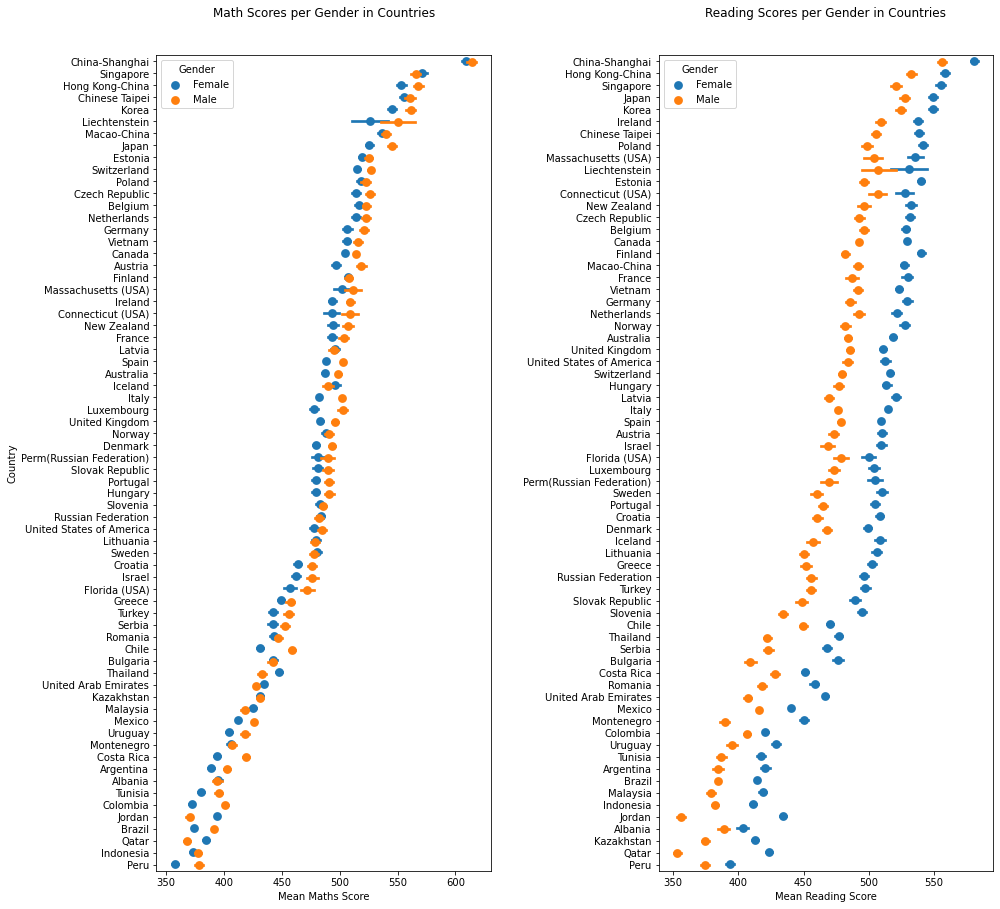

In [42]:
# using pointplot subplots, plot each country against the mean scores, with gender in 'hue' 
math_order = pisa_clean.groupby('Country')['Math_Mean'].mean().sort_values(ascending = False).index
read_order = pisa_clean.groupby('Country')['Reading_Mean'].mean().sort_values(ascending = False).index

#plot
plt.figure(figsize = [15, 15])
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1,2,1)
ax = sb.pointplot(data = pisa_clean, x= 'Math_Mean', y = 'Country', hue = 'Gender', dodge = 0.1,
                  linestyles = "", order = math_order)
plt.ylabel('Country')
plt.xlabel('Mean Maths Score')
plt.title('Math Scores per Gender in Countries', y =1.04)

plt.subplot(1,2,2)
ax = sb.pointplot(data = pisa_clean, x= 'Reading_Mean', y = 'Country', hue = 'Gender', dodge = 0.1,
                  linestyles = "", order = read_order)
plt.ylabel('')
plt.xlabel('Mean Reading Score')
plt.title('Reading Scores per Gender in Countries', y =1.04);

### Dependency Wealth and Math Score by Genders

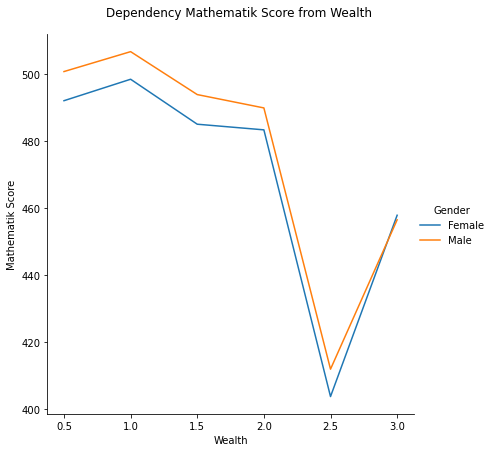

In [55]:
def mean_poly(x, y, bins = 10, **kwargs):
    
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs);

bin_edges = np.arange(0.25, pisa_clean['Wealth'].max()+0.5, 0.5)
g = sb.FacetGrid(data = pisa_clean, hue = 'Gender', size = 6)
g.map(mean_poly, "Wealth", "Math_Mean", bins = bin_edges)
g.set_ylabels('Mathematik Score')
g.fig.suptitle('Dependency Mathematik Score from Wealth',y=1.04)
g.add_legend();

### The influence of mom at home on grades

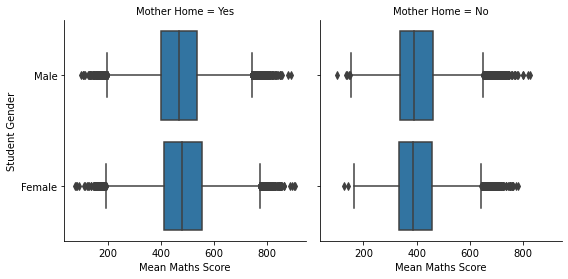

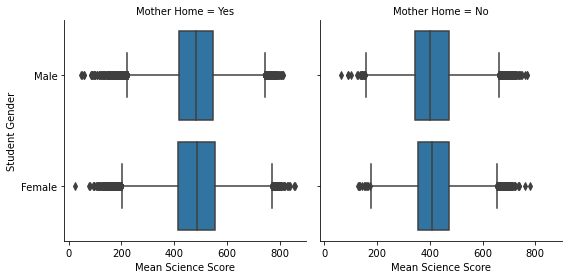

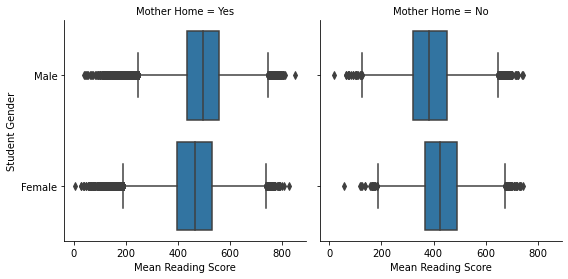

In [37]:
# FacetGrid boxplots when mother at home for each of the three mean score types

g = sb.FacetGrid(data = pisa_clean, col = 'Mother Home', height =4)
g.map(sb.boxplot, 'Math_Mean','Gender')
g.set_ylabels('Student Gender')
g.set_xlabels('Mean Maths Score')

g = sb.FacetGrid(data = pisa_clean, col = 'Mother Home', height =4)
g.map(sb.boxplot, 'Science_Mean','Gender')
g.set_ylabels('Student Gender')
g.set_xlabels('Mean Science Score')

g = sb.FacetGrid(data = pisa_clean, col = 'Mother Home', height =4)
g.map(sb.boxplot,'Reading_Mean','Gender' )

g.set_ylabels('Student Gender')
g.set_xlabels('Mean Reading Score');

- Grades of those whose mother at home are much higher.
- Especially by boys and reading grades

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Girl in all countries have better notes in reading then boys. In Mathematic this difference is not so obviosly  and in most  of countries they have better notes. Just in some countries like Jordan, Thailand and Quatar.
Important to notice that in these countries Mathematic score are at the end of the list of all countries. The Leaders is China, Singapore, Korea.

### Were there any interesting or surprising interactions between features?

> I find intersting that note difference in reading is so big, but in mathematic it is not so obvios. Bytheway i was surprised that, when mother not at home with her son than his reading notes signifficant lower then by other group.